In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely.geometry as sgeom
from descartes import PolygonPatch

import matplotlib as mpl

In [2]:
path = "/glm/G05GT1H/"
files = sorted([os.path.join(path, file) for file in os.listdir(path)])

In [3]:
gdf = gpd.read_file("/home/adriano/CAP-395/data/GEO/Vector/SouthAmericaPolygon/South_America.shp", 
                    crs={'init': 'epsg:4326'})
gdf.head()

,COUNTRY,geometry
0,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
1,Bolivia,"POLYGON ((-62.19884 -20.47139, -62.26945 -20.5..."
2,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
3,Chile,"MULTIPOLYGON (((-73.61806 -51.63390, -73.60494..."
4,Colombia,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."


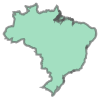

In [4]:
country_geom = gdf[gdf['COUNTRY'] == 'Brazil'].iloc[0, -1]
country_geom

In [5]:
nc = xr.load_dataset(files[0])
glons = nc['lon'].data
glats = nc['lat'].data
gtimes = nc['time'].data
gvars = nc['var'].data

In [6]:
clons, clats, lons_idx, lats_idx = [], [], [], []
out_lon, out_lat = [], []
for i, lat in enumerate(glats):
    for j, lon in enumerate(glons):
        if country_geom.contains(sgeom.Point(lon, lat)):
            clats.append(lat)
            clons.append(lon)
            lats_idx.append(i)
            lons_idx.append(j)
        else:
            out_lat.append(i)
            out_lon.append(j)
            
clons = np.array(clons)
clats = np.array(clats)

lons_idx = np.array(lons_idx)
lats_idx = np.array(lats_idx)

out_lon = np.array(out_lon)
out_lat = np.array(out_lat)

/glm/G05GT1H/GLM_2020_12_hourly_05x05.nc 93088.0


/home/adriano/sthunder/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


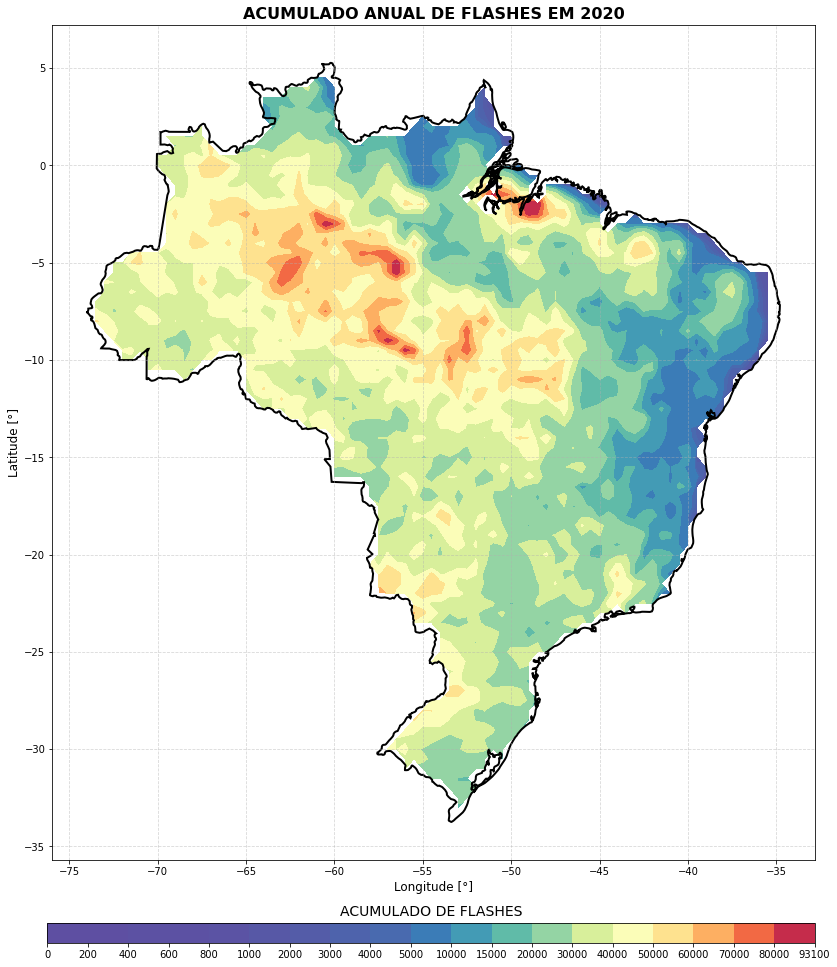

In [7]:
dpi = 100
width = np.round(1366 * 100 / 100)
height = 768*2

vmin, vmax = 0, 93100
cmap = 'Spectral_r'
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# levels = np.linspace(vmin, vmax, 10)
levels = (0, 200, 400, 600, 800, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 
          70000, 80000, 93100)

fig, ax = plt.subplots(1, 1, figsize=(width/dpi, height/dpi), facecolor='w', sharex=True, sharey=True)

mat = np.zeros((glats.shape[0], glons.shape[0]))
for i, file in enumerate(files):       
    gvars = xr.load_dataset(file)['var'].data
    
    for lat_idx, lon_idx in zip(lats_idx, lons_idx):
        mat[lat_idx][lon_idx] += gvars[:, lat_idx, lon_idx].sum()

    mlon, mlat = np.meshgrid(glons[lons_idx.min(): lons_idx.max()], glats[lats_idx.min(): lats_idx.max()])
    mat[out_lat, out_lon] = np.nan
    
maxv = 0
for ii in range(gvars.shape[1]):
    for jj in range(gvars.shape[2]):
        maxv = mat[ii, jj].sum() if mat[ii, jj].sum() > maxv else maxv
print(file, maxv)

ax.set_title(f"ACUMULADO ANUAL DE FLASHES EM 2020", fontdict={'size': 16, 'weight': 'bold'})
img = ax.contourf(mlon, mlat, mat[lats_idx.min():lats_idx.max(), lons_idx.min(): lons_idx.max()], 
             cmap=cmap, levels=levels, norm=norm)
path = PolygonPatch(country_geom, ec='k', fc='none', lw=2)
ax.add_patch(path)

ax.grid(ls='--', alpha=0.5)

ax.set_xlabel('Longitude [°]', fontdict={'size': 12})
ax.set_ylabel('Latitude [°]', fontdict={'size': 12})
    
cbaxes = fig.add_axes([0.12, 0.05, 0.780, 0.0175])
cbar = fig.colorbar(
    img, cax=cbaxes, ticks=levels, orientation="horizontal",
    extend='both',
    shrink=0.5
)
cbar.set_label(
    r"ACUMULADO DE FLASHES",
    labelpad=-55, fontdict={'size': 14, 'weight': '500'},
)

plt.savefig(f"density_map_anual.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)

In [8]:
months_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 
                 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# months_labels = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 
#                  8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

/glm/G05GT1H/GLM_2020_01_hourly_05x05.nc 24673.0
/glm/G05GT1H/GLM_2020_02_hourly_05x05.nc 24538.0
/glm/G05GT1H/GLM_2020_03_hourly_05x05.nc 19139.0
/glm/G05GT1H/GLM_2020_04_hourly_05x05.nc 11591.0
/glm/G05GT1H/GLM_2020_05_hourly_05x05.nc 18139.0
/glm/G05GT1H/GLM_2020_06_hourly_05x05.nc 11816.0
/glm/G05GT1H/GLM_2020_07_hourly_05x05.nc 11045.0
/glm/G05GT1H/GLM_2020_08_hourly_05x05.nc 37796.0
/glm/G05GT1H/GLM_2020_09_hourly_05x05.nc 26290.0
/glm/G05GT1H/GLM_2020_10_hourly_05x05.nc 39400.0
/glm/G05GT1H/GLM_2020_11_hourly_05x05.nc 37289.0
/glm/G05GT1H/GLM_2020_12_hourly_05x05.nc 21705.0


/home/adriano/sthunder/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


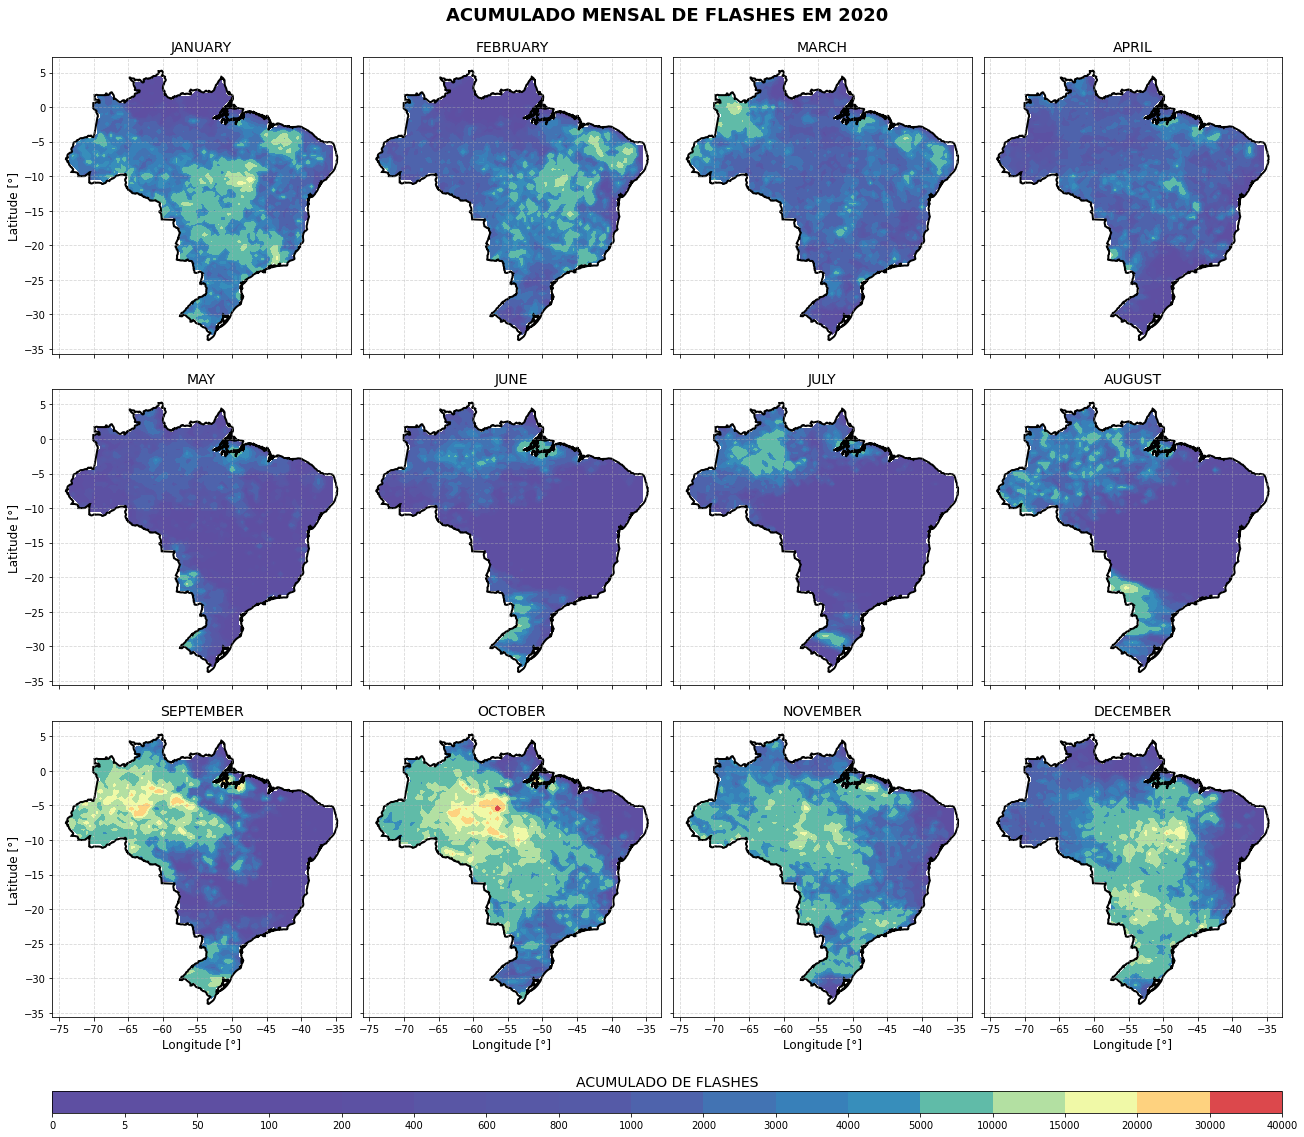

In [9]:
dpi = 100
width = np.round(1366 * 125 / 100)
height = 768*2.3

vmin, vmax = 0, 40000
cmap = 'Spectral_r'
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# levels = np.linspace(vmin, vmax, 10)
levels = (0, 5, 50, 100, 200, 400, 600, 800, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 30000, 40000)

fig, ax = plt.subplots(3, 4, figsize=(width/dpi, height/dpi), facecolor='w', sharex=True, sharey=True)
fig.suptitle("ACUMULADO MENSAL DE FLASHES EM 2020", size=18, weight='bold', y=0.92)

for i, file in enumerate(files):    
    row = i//4
    col = i%4
    
    mat = np.zeros((glats.shape[0], glons.shape[0]))
    gvars = xr.load_dataset(file)['var'].data
    
    maxv = 0
    for ii in range(gvars.shape[1]):
        for jj in range(gvars.shape[2]):
            maxv = gvars[:, ii, jj].sum() if gvars[:, ii, jj].sum() > maxv else maxv
    print(file, maxv)
    
    for lat_idx, lon_idx in zip(lats_idx, lons_idx):
        mat[lat_idx][lon_idx] += gvars[:, lat_idx, lon_idx].sum()

    mlon, mlat = np.meshgrid(glons[lons_idx.min(): lons_idx.max()], glats[lats_idx.min(): lats_idx.max()])
#     mat[mat == 0] = np.nan
    mat[out_lat, out_lon] = np.nan
    
    ax[row][col].set_title(f"{months_labels[i+1].upper()}", fontdict={'size': 14, 'weight': '500'})
    img = ax[row][col].contourf(mlon, mlat, mat[lats_idx.min():lats_idx.max(), lons_idx.min(): lons_idx.max()], 
                 cmap=cmap, levels=levels, norm=norm)
    path = PolygonPatch(country_geom, ec='k', fc='none', lw=2)
    ax[row][col].add_patch(path)
    
    ax[row][col].grid(ls='--', alpha=0.5)
    if row == 2:
        ax[row][col].set_xlabel('Longitude [°]', fontdict={'size': 12})
    if col == 0:
        ax[row][col].set_ylabel('Latitude [°]', fontdict={'size': 12})
    
    
plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                        hspace=0.12, wspace=0.04)
cbaxes = fig.add_axes([0, 0.05, 1, 0.0175])
cbar = fig.colorbar(
    img, cax=cbaxes, ticks=levels, orientation="horizontal",
    extend='both',
    shrink=0.5
)
cbar.set_label(
    r"ACUMULADO DE FLASHES",
    labelpad=-55, fontdict={'size': 14, 'weight': '500'},
)

plt.savefig(f"density_map_month.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)

In [10]:
def get_station_flashes(station_keys):
    mat = np.zeros((glats.shape[0], glons.shape[0]))
    for month, days in station_keys.items():
        filename = f"/glm/G05GT1H/GLM_2020_{str(month).zfill(2)}_hourly_05x05.nc"
        gvars = xr.load_dataset(filename)['var'].data[days[0]*24:days[1]*24+1, :, :]

        maxv = 0
        for ii in range(gvars.shape[1]):
            for jj in range(gvars.shape[2]):
                maxv = gvars[:, ii, jj].sum() if gvars[:, ii, jj].sum() > maxv else maxv

        for lat_idx, lon_idx in zip(lats_idx, lons_idx):
            mat[lat_idx][lon_idx] += gvars[:, lat_idx, lon_idx].sum()
    
    return mat
    

In [11]:
stations_labels = {1: 'Outono', 2: 'Inverno', 3: 'Primavera', 4: 'Verão'}
stations_labels = {1: 'Autumn', 2: 'Winter', 3: 'Spring', 4: 'Summer'}

/home/adriano/sthunder/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


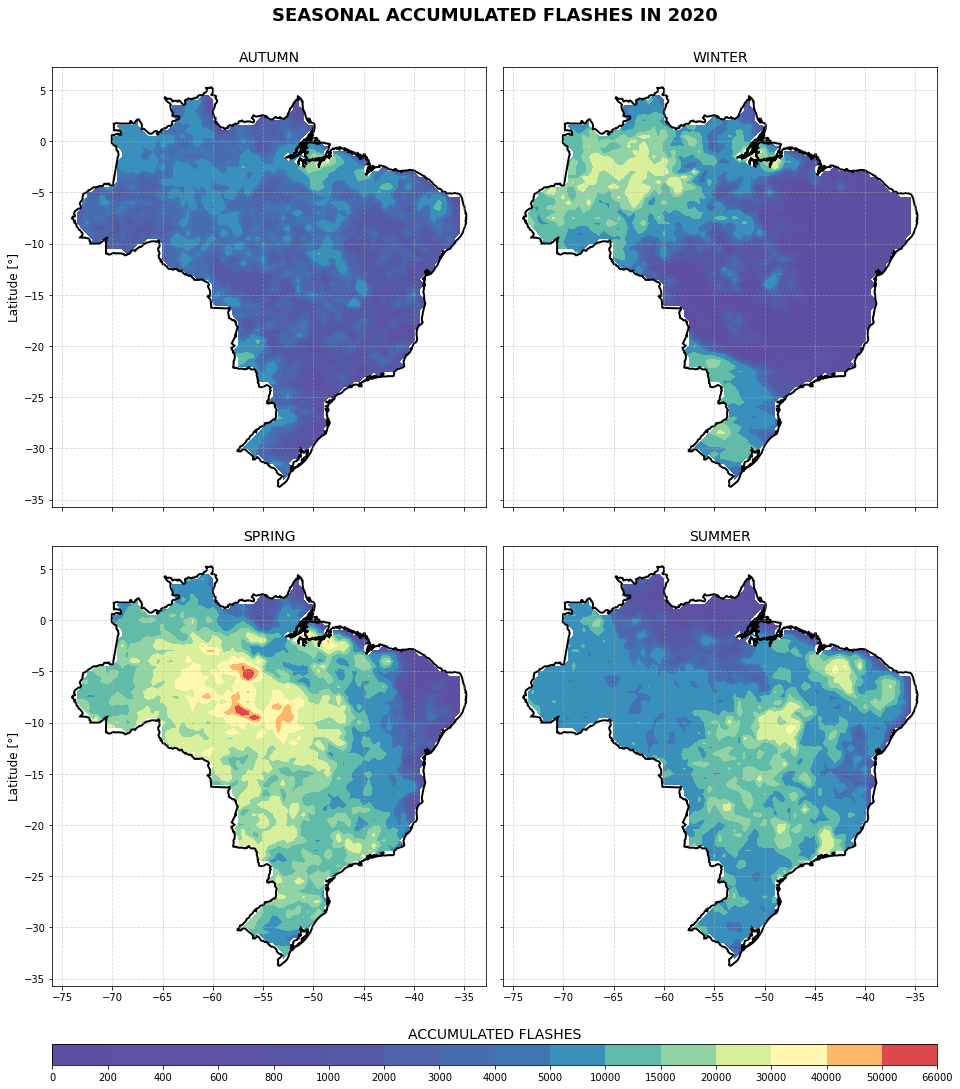

In [12]:
autumn_keys = {3: (20, 31), 4: (0, 30), 5: (0, 31), 6: (0, 20)}
winter_keys = {6: (20, 30), 7: (0, 31), 8: (0, 31), 9: (0, 22)}
spring_keys = {9: (22, 30), 10: (0, 31), 11: (0, 30), 12: (0, 21)}
summer_keys = {12: (21, 31), 1: (0, 31), 2: (0, 29), 3: (0, 20)}

autumn = np.zeros((glats.shape[0], glons.shape[0]))
winter = np.zeros((glats.shape[0], glons.shape[0]))
spring = np.zeros((glats.shape[0], glons.shape[0]))
summer = np.zeros((glats.shape[0], glons.shape[0]))

station_keys = [autumn_keys, winter_keys, spring_keys, summer_keys]
stations = [get_station_flashes(sk) for sk in station_keys]

dpi = 100
width = np.round(1366 * 90 / 100)
height = 768*2.2

vmin, vmax = 0, 66000
cmap = 'Spectral_r'
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
levels = (0, 200, 400, 600, 800, 1000, 2000, 3000, 4000, 
          5000, 10000, 15000, 20000, 30000, 40000, 50000, 66000)

fig, ax = plt.subplots(2, 2, figsize=(width/dpi, height/dpi), facecolor='w', sharex=True, sharey=True)

# fig.suptitle("ACUMULADO SAZONAL DE FLASHES EM 2020", size=18, weight='bold', y=0.93)
fig.suptitle("SEASONAL ACCUMULATED FLASHES IN 2020", size=18, weight='bold', y=0.93)
for i, station in enumerate(stations):   
#     print(stations_labels[station], station.max())
    row = i//2
    col = i%2
    
#     station[station == 0] = np.nan
    station[out_lat, out_lon] = np.nan
    ax[row][col].set_title(f"{stations_labels[i+1].upper()}", fontdict={'size': 14, 'weight': '500'})
    img = ax[row][col].contourf(mlon, mlat, station[lats_idx.min():lats_idx.max(), lons_idx.min(): lons_idx.max()], 
                 cmap=cmap, levels=levels, norm=norm)
    path = PolygonPatch(country_geom, ec='k', fc='none', lw=2)
    ax[row][col].add_patch(path)
    
    ax[row][col].grid(ls='--', alpha=0.5)
    if row == 2:
        ax[row][col].set_xlabel('Longitude [°]', fontdict={'size': 12})
    if col == 0:
        ax[row][col].set_ylabel('Latitude [°]', fontdict={'size': 12})
    
    
plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                        hspace=0.09, wspace=0.04)
cbaxes = fig.add_axes([0, 0.06, 1, 0.0175])
cbar = fig.colorbar(
    img, cax=cbaxes, ticks=levels, orientation="horizontal",
    extend='both',
    shrink=0.5
)
cbar.set_label(
#     r"ACUMULADO DE FLASHES",
    r"ACCUMULATED FLASHES",
    labelpad=-55, fontdict={'size': 14, 'weight': '500'},
)


plt.savefig(f"density_map_stations.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
